In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

crowded_gym = pd.read_csv('crowdness_gym_data.csv')
crowded_gym.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


We are now going to plot the number of observations by month, day of week, and time to find any patterns that may arise.

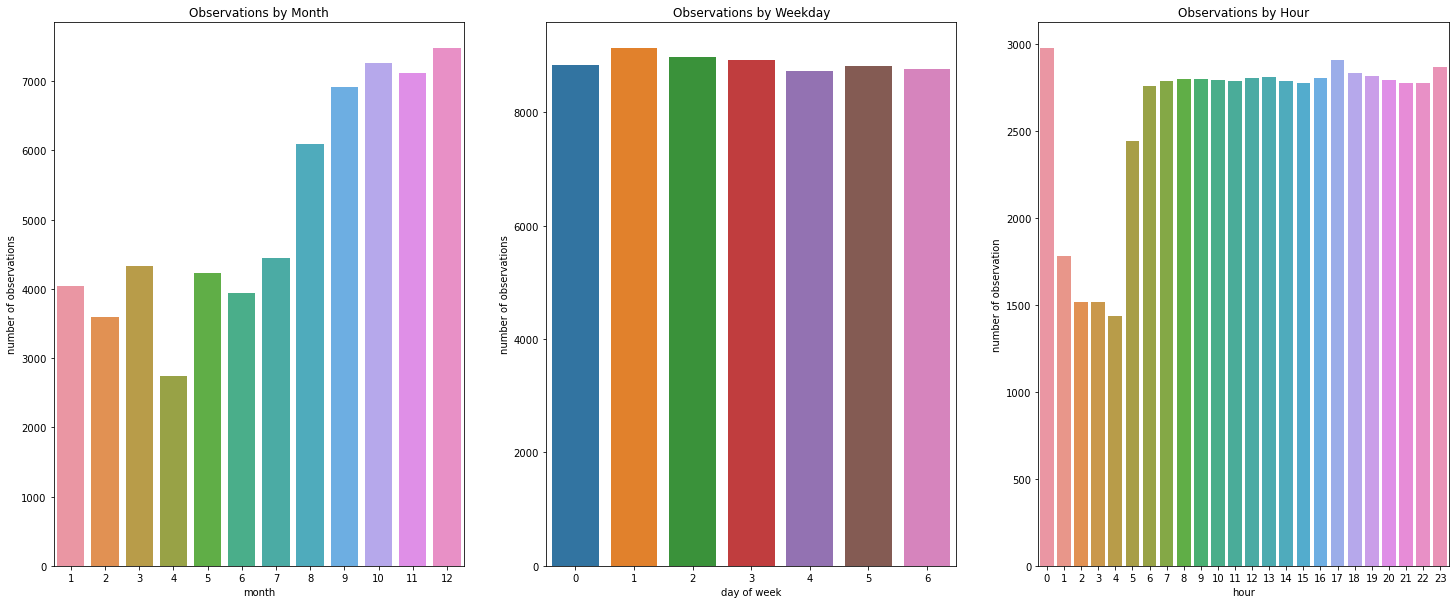

In [2]:
fig, axs = plt.subplots(nrows=1, ncols=3,
                                    figsize=(25,10))


sns.countplot(data = crowded_gym, x = 'month', ax=axs[0])
axs[0].set_ylabel('number of observations')
axs[0].set_title('Observations by Month')

sns.countplot(data = crowded_gym, x = 'day_of_week', ax=axs[1])
axs[1].set_xlabel('day of week')
axs[1].set_ylabel('number of observations')
axs[1].set_title('Observations by Weekday')

sns.countplot(data = crowded_gym, x = 'hour', ax=axs[2])
axs[2].set_ylabel('number of observation')
axs[2].set_title('Observations by Hour')

plt.show()

In [3]:
print(crowded_gym.isna().sum())

number_people           0
date                    0
timestamp               0
day_of_week             0
is_weekend              0
is_holiday              0
temperature             0
is_start_of_semester    0
is_during_semester      0
month                   0
hour                    0
dtype: int64


In [4]:
print(crowded_gym.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB
None


After inspecting the data, we see that there are no null values, and that the date column is redundant given the information in the other columns. 

In [5]:
crowded_gym = crowded_gym.drop('date', axis = 1)

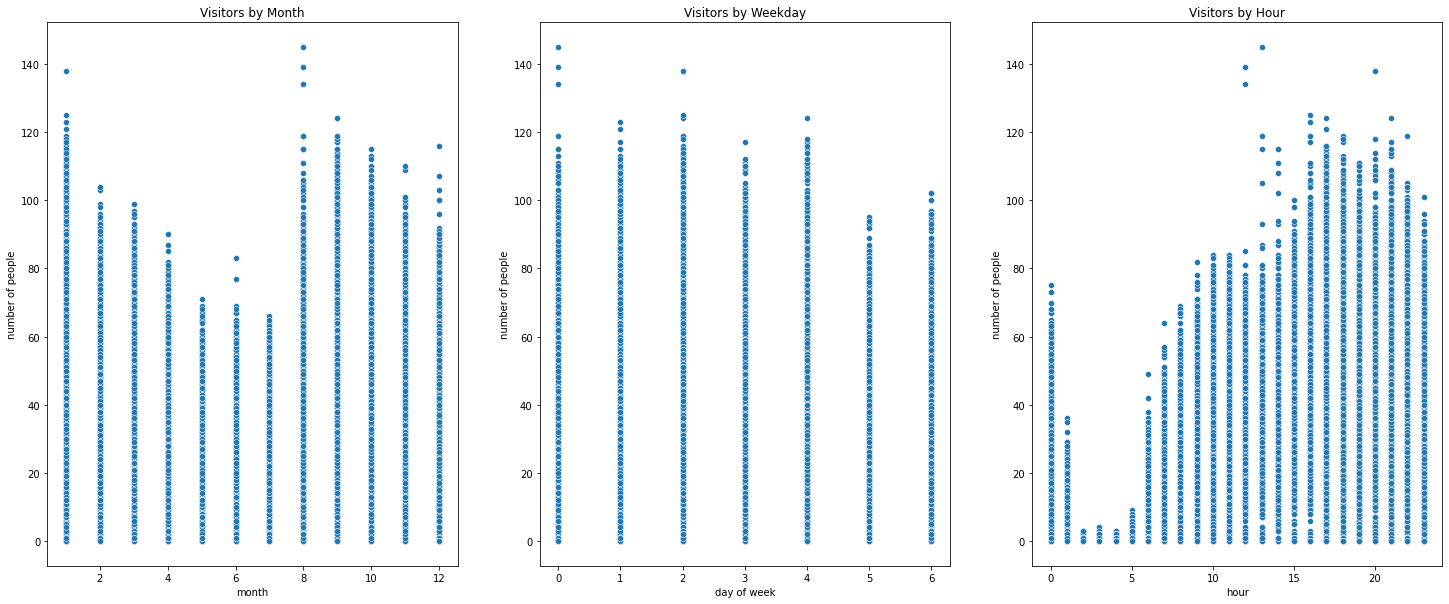

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=3,
                                    figsize=(25,10))


sns.scatterplot(data = crowded_gym, x = 'month', y= 'number_people', ax=axs[0])
axs[0].set_ylabel('number of people')
axs[0].set_title('Visitors by Month')

sns.scatterplot(data = crowded_gym, x = 'day_of_week', y= 'number_people', ax=axs[1])
axs[1].set_xlabel('day of week')
axs[1].set_ylabel('number of people')
axs[1].set_title('Visitors by Weekday')

sns.scatterplot(data = crowded_gym, x = 'hour', y= 'number_people', ax=axs[2])
axs[2].set_ylabel('number of people')
axs[2].set_title('Visitors by Hour')

plt.show()

From our initial dataset, it looks like going to the gym around 5am on Fridays during the summer is the least crowded time to go.

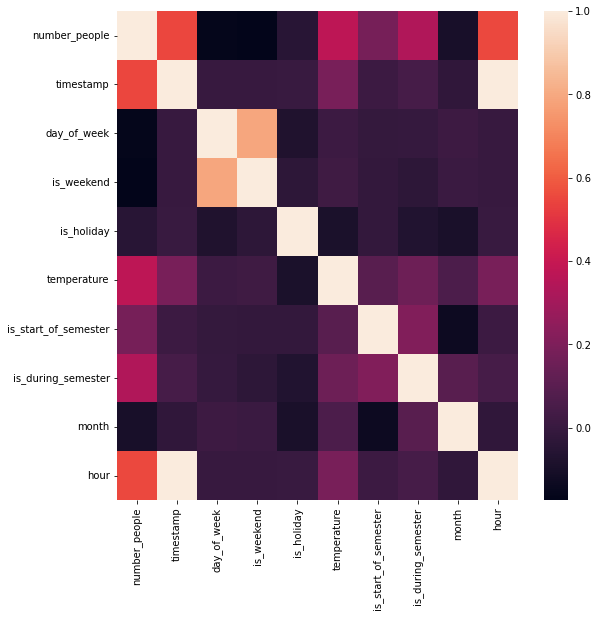

In [7]:
plt.figure(figsize=(9, 9))
sns.heatmap(crowded_gym.corr())
plt.show()

In [8]:
crowded_gym = crowded_gym.drop('timestamp', axis=1)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import SGDRegressor

X = crowded_gym.copy().drop('number_people', axis = 1)
y = crowded_gym['number_people']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 727)

sgdr_v1 = SGDRegressor(loss = 'huber', penalty = 'elasticnet', learning_rate = 'optimal')
sgdr_v1.fit(X_train, y_train)
predictions_v1 = sgdr_v1.predict(X_test)
mean_sqr_v1 = mean_squared_error(y_test, predictions_v1)
mean_abs_v1 = mean_absolute_error(y_test, predictions_v1)
r2_score_v1 = r2_score(y_test, predictions_v1)
print("The mean square error of the model is {}.".format(round(mean_sqr_v1, 2)))
print("The r2 score of the model is {}.".format(round(r2_score_v1, 3)))
print("The mean absolute error of the model is {}.".format(round(mean_abs_v1, 2)))

The mean square error of the model is 283.44.
The r2 score of the model is 0.444.
The mean absolute error of the model is 12.57.


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_transform = scaler.transform(X_train)
X_test_transform = scaler.transform(X_test)

sgdr_v2 = SGDRegressor(loss = 'huber', penalty = 'elasticnet', learning_rate = 'optimal', random_state = 52)
sgdr_v2.fit(X_train_transform, y_train)
predictions_v2 = sgdr_v2.predict(X_test_transform)
mean_sqr_v2 = mean_squared_error(y_test, predictions_v2)
mean_abs_v2 = mean_absolute_error(y_test, predictions_v2)
r2_score_v2 = r2_score(y_test, predictions_v2)
print("The mean square error of the model is {}.".format(round(mean_sqr_v2, 2)))
print("The r2 score of the model is {}.".format(round(r2_score_v2, 3)))
print("The mean absolute error of the model is {}.".format(round(mean_abs_v2, 2)))

The mean square error of the model is 253.43.
The r2 score of the model is 0.502.
The mean absolute error of the model is 12.07.


We can see that the accuracy of our model improved when we scaled our data.

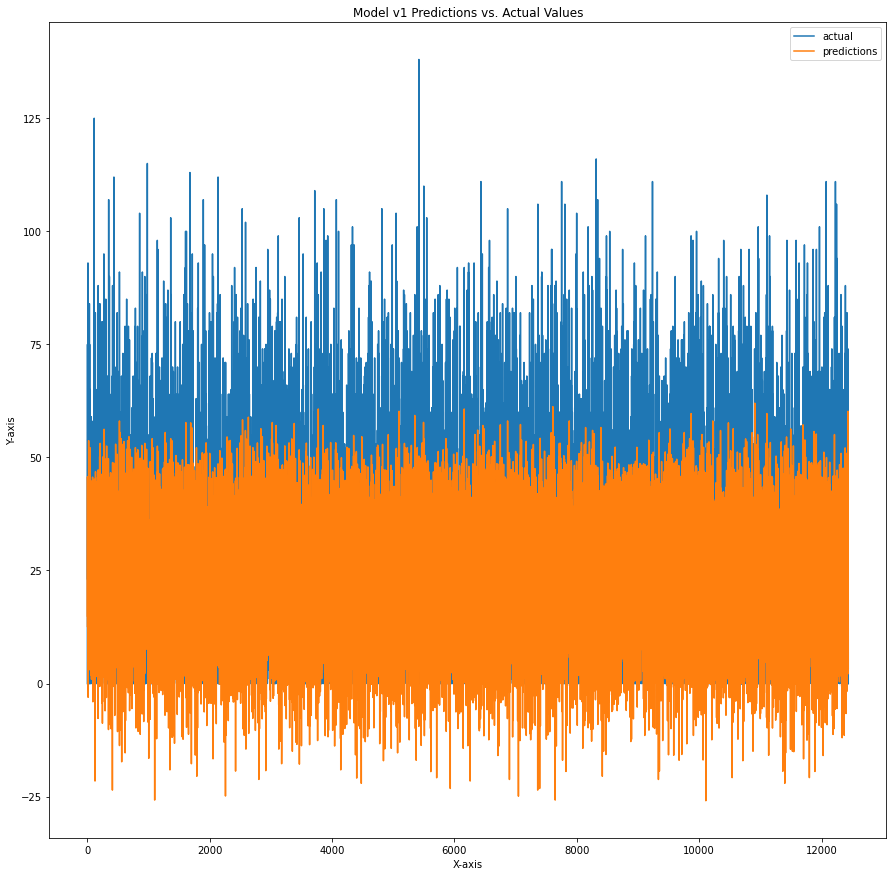

In [11]:
ax_x = range(len(y_test))

plt.figure(figsize=(15, 15))
plt.plot(ax_x, y_test, label = 'actual')
plt.plot(ax_x, predictions_v1, label = 'predictions')
plt.xlabel('X-axis')
plt.ylabel("Y-axis")
plt.title("Model v1 Predictions vs. Actual Values")
plt.legend(loc = 'best')
plt.show()

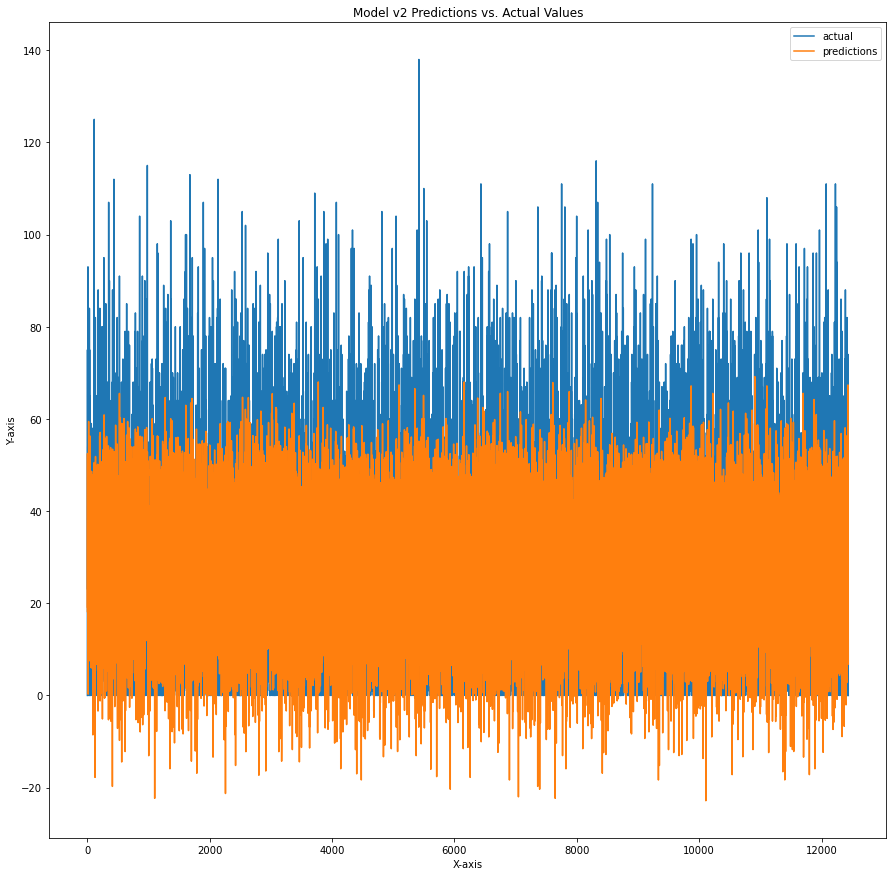

In [12]:
ax_x = range(len(y_test))

plt.figure(figsize=(15, 15))
plt.plot(ax_x, y_test, label = 'actual')
plt.plot(ax_x, predictions_v2, label = 'predictions')
plt.xlabel('X-axis')
plt.ylabel("Y-axis")
plt.title("Model v2 Predictions vs. Actual Values")
plt.legend(loc = 'best')
plt.show()

Clearly, our model has room for improvment and could benefit from tweaking some hyperparameters. Our model is consistently underpredicting the number of people at the gym.